<a href="https://colab.research.google.com/github/Sadia7766/Assignment/blob/main/SM_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sadia Akter

ID:2215151033


**Question:**

Given Situation:

   On- hand inventory: [ 15, 25, 35, 40, 42, 55 ]

   Probability: [ 0.12, 0.25, 0.35, 0.20, 0.06, 0.02 ]

   a) Simulating 60 weeks, what is the estimated average order size?

   b)Based on the simulation, what is the average total cost of 'having' the product?

   c)3 Single Server Queueing Problems

In [10]:
## a) Estimated Average Order Size

import random
import pandas as pd

# Given inventory probability distribution
inventory_dist = {
    'On-hand inventory': [15, 25, 35, 40, 42, 55],
    'Probability': [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]
}

# Create cumulative probability ranges
df = pd.DataFrame(inventory_dist)
df['Cumulative'] = df['Probability'].cumsum()
df['Range'] = pd.cut(df['Cumulative'], bins=[0, 0.12, 0.37, 0.72, 0.92, 0.98, 1.0],
                     labels=['00-11', '12-36', '37-71', '72-91', '92-97', '98-99'])

# Simulate 30 orders (60 weeks / 2 weeks per order)
order_sizes = []
for _ in range(30):
    rand_num = random.randint(0, 99)
    for i, row in df.iterrows():
        if rand_num <= int(row['Range'].split('-')[1]):
            order_size = 100 - row['On-hand inventory']
            order_sizes.append(order_size)
            break

# Calculate average order size
average_order_size = sum(order_sizes) / len(order_sizes)
print(f"Estimated average order size: {average_order_size:.2f}")

Estimated average order size: 68.43


In [11]:
## b) Average Total Cost of "Having" the Product

# Cost parameters
ordering_cost = 50
product_cost = 4
holding_cost = 1
selling_price = 12

# Assume demand between orders is 30 units
demand_between_orders = 30

# Initialize variables
total_ordering_cost = 0
total_product_cost = 0
total_holding_cost = 0

# Calculate costs for each order
for order_size in order_sizes:
    total_ordering_cost += ordering_cost
    total_product_cost += product_cost * order_size

    # Calculate average inventory and holding cost (simplified)
    avg_inventory = (order_size + (100 - order_size)) / 2
    total_holding_cost += holding_cost * avg_inventory * 2
# Calculate total and average weekly cost
total_cost = total_ordering_cost + total_product_cost + total_holding_cost
average_weekly_cost = total_cost / 60

print(f"Average total weekly cost: ${average_weekly_cost:.2f}")

Average total weekly cost: $211.87


Server Utilization: 85.03%
Average Waiting Time: 1.57 hours
Average Queue Length: 0.89 customers


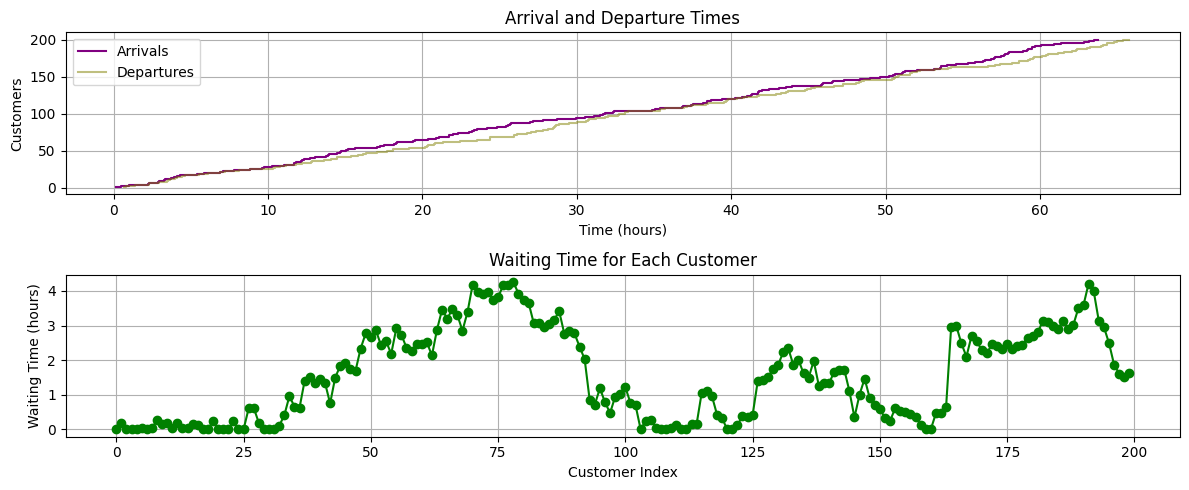

In [25]:
## Problem 1: λ=3, μ=4 (200 customers)

import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 3  # arrival rate (customers/hour)
mu_rate = 4      # service rate (customers/hour)
n_customers = 200

# Generate inter-arrival and service times
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)

# Calculate arrival times
arrival_times = np.cumsum(inter_arrival_times)

# Initialize variables
start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)

# First customer starts immediately
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

# Simulate queue for remaining customers
for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

# Calculate metrics
waiting_times = start_times - arrival_times
total_times = end_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

# Print results
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} hours")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot arrival and departure times
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post', color='purple')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post', color='olive',alpha=0.5)
plt.xlabel('Time (hours)')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Arrival and Departure Times')

# Plot waiting times
plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time (hours)')
plt.grid(True)
plt.title('Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

In [26]:
## Problem 2: λ=8, μ=6 (Server Overload)

# Parameters for overloaded system
lambda_rate = 8
mu_rate = 6
n_customers = 200


In [27]:
## Problem 3: Limited Queue Capacity (max 10 customers)

import numpy as np

# Parameters
lambda_rate = 5
mu_rate = 8
n_customers = 100
max_queue = 10

# Initialize variables
np.random.seed(0)
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
waiting_times = np.zeros(n_customers)
queue_lengths = np.zeros(n_customers)
lost_customers = 0

# First customer
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]
waiting_times[0] = 0
queue_lengths[0] = 0

for i in range(1, n_customers):
    customers_in_system = np.sum(end_times[:i] > arrival_times[i])

    if customers_in_system >= max_queue + 1:

        lost_customers += 1
        start_times[i] = -1
        end_times[i] = -1
        waiting_times[i] = -1
        queue_lengths[i] = max_queue
    else:
        start_times[i] = max(arrival_times[i], end_times[i-1])
        end_times[i] = start_times[i] + service_times[i]
        waiting_times[i] = start_times[i] - arrival_times[i]
        queue_lengths[i] = max(0, customers_in_system - 1)

valid_customers = (waiting_times != -1)
if np.sum(valid_customers) > 0:
    total_service_time = np.sum(service_times[valid_customers])
    last_valid_end = np.max(end_times[valid_customers])
    server_utilization = total_service_time / last_valid_end
    avg_waiting_time = np.mean(waiting_times[valid_customers])
    avg_queue_length = np.mean(queue_lengths[valid_customers])
else:
    server_utilization = 0
    avg_waiting_time = 0
    avg_queue_length = 0

print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} hours")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")
print(f"Number of Lost Customers: {lost_customers}")

Server Utilization: 71.08%
Average Waiting Time: 0.28 hours
Average Queue Length: 1.64 customers
Number of Lost Customers: 0
